In [1]:
import os
import sys
import matplotlib.pyplot as plt
# add local lib to sys path for relative import
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# import pandas as pd
from src import vis
from src.log.common import read_pickle, TensorType
import re
from ipywidgets import interact, widgets,fixed, AppLayout
import pandas as pd
df = read_pickle('../test-data/numerics_df_v3.pkl')


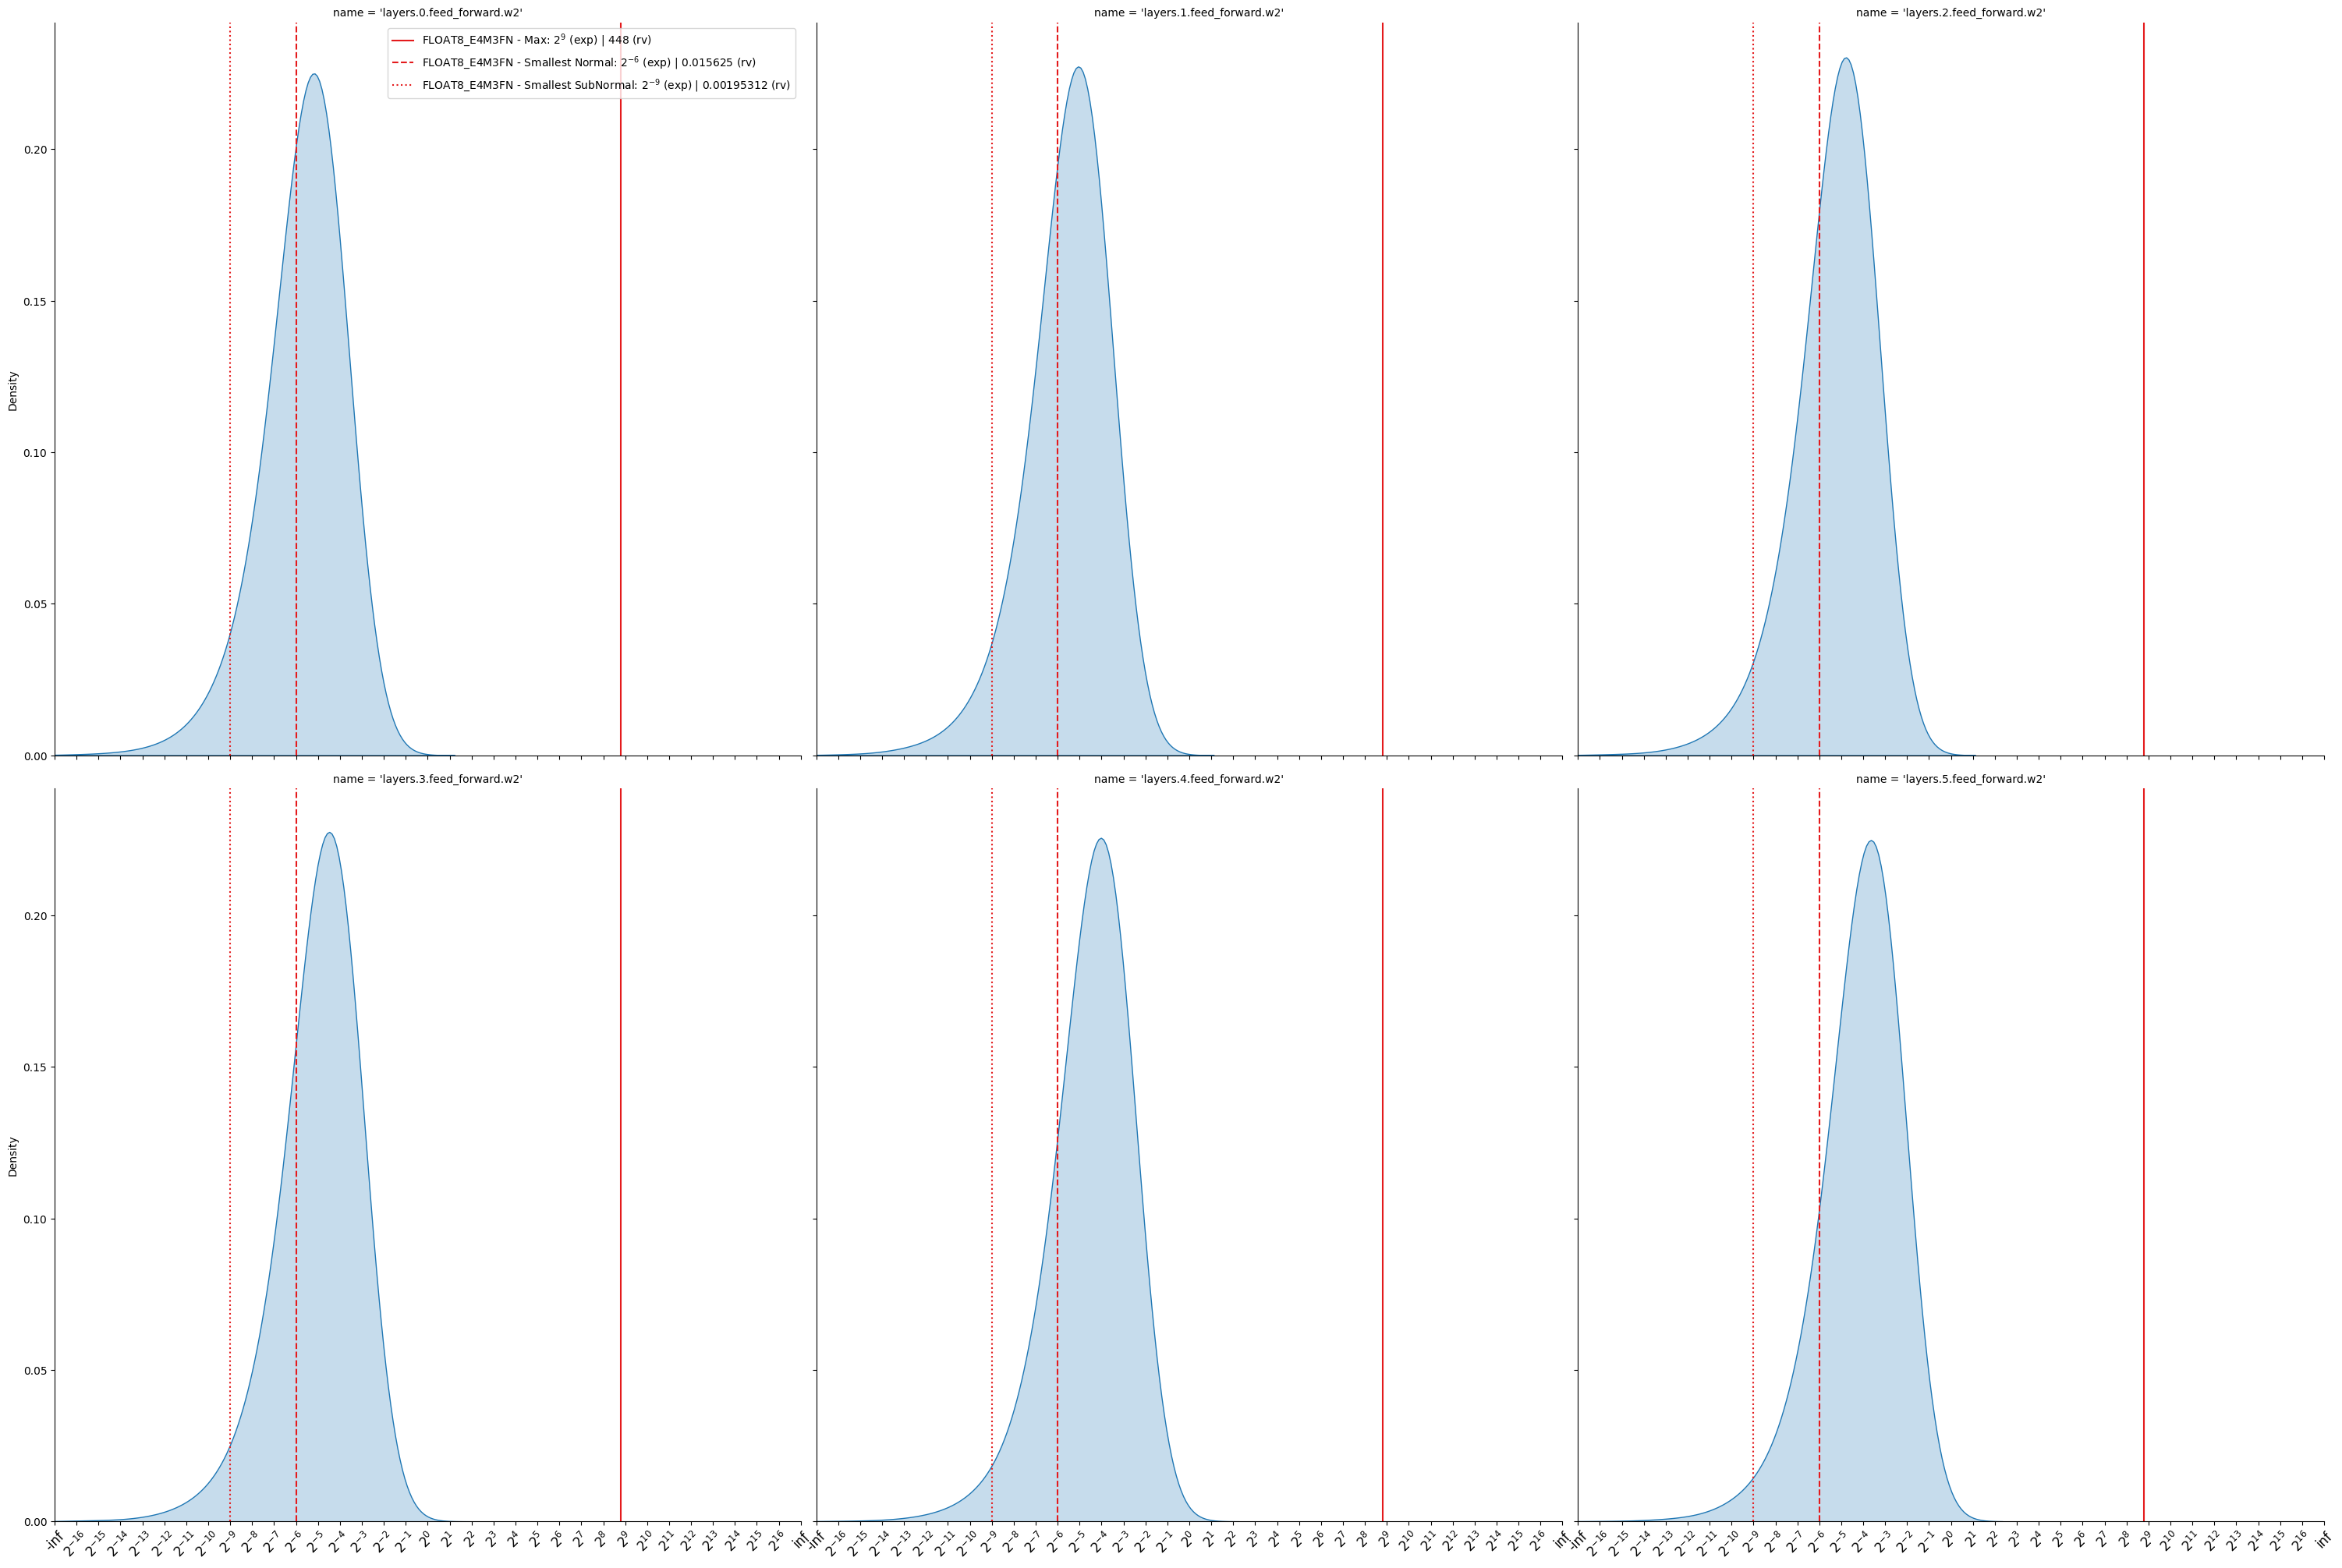

In [2]:
fig=vis.exp_hist(
    df,
    layer=re.compile('layers.[0-5].feed_forward.w2'),
    tt=TensorType.Activation,
    step=1000,
    kind='kde',
    col_wrap=3,
    dtype_info=(True, True, True),
    dtype_annotation= True,
)

In [3]:
def f(df,plot,step, layer, tt):
    tt = list(tt)
    layer= list(layer)
    # print(layer)
    if len(layer) != 0:
        fig=vis.exp_hist(
            df,
            layer=layer if len(layer) > 1 else layer[0],
            tt=tt if len(tt) > 1 else tt[0],
            step=step,
            kind=plot,
            col_wrap=4,
            figsize=(8,5),
            dtype_info=(True, True, True),
            dtype_annotation= True,
        )
        _ = fig.tight_layout()


def interact_exp_hist(df: pd.DataFrame):


    
    interact(f,
             df = fixed(df),
             plot = widgets.Dropdown(options=['line','bar','kde'], value='bar'), 
             step=widgets.IntSlider(
                 min=df.metadata.step.min(),
                 max=df.metadata.step.max(),
                 step=1,
                 value=df.metadata.step.min()),
            layer=widgets.TagsInput(allowed_tags=df.metadata.name.unique().tolist(), value = (df.metadata.name.unique()[0],),),
            tt= widgets.SelectMultiple(options=df.metadata.grad.unique().tolist(), value=(df.metadata.grad.unique().tolist()[0],))
                 
                 
                 )

interact_exp_hist(df)




interactive(children=(Dropdown(description='plot', index=1, options=('line', 'bar', 'kde'), value='bar'), IntS…

In [ ]:
# Y-Axis, X-axis Formatting not consistent for kde plots
# Y-axis not consistent for hist

In [17]:
# precomputing all images
x = np.linspace(0,np.pi,200)
y = np.linspace(0,10,200)
X,Y = np.meshgrid(x,y)
parameter = np.linspace(-5,5)
example_image_stack = np.sin(X)[None,:,:]+np.exp(np.cos(Y[None,:,:]*parameter[:,None,None]))

In [21]:
plt.switch_backend('ipympl')
with plt.ioff():
    fig = plt.figure()
im = plt.imshow(example_image_stack[0])

def update(change):
    im.set_data(example_image_stack[change['new']])
    fig.canvas.draw_idle()
    
    
slider = widgets.IntSlider(value=0, min=0, max=len(parameter)-1)
slider.observe(update, names='value')
widgets.VBox([slider, fig.canvas])


In [6]:
selected_data = []
for i in range(0, len(checkboxes)):
    if checkboxes[i].value == True:
        selected_data = selected_data + [checkboxes[i].description]
print(selected_data)

['data1', 'data4']


In [19]:
from ipywidgets import AppLayout, FloatSlider, VBox, Checkbox, Layout, Button, Box, Label, SelectMultiple
import matplotlib.pyplot as plt
import numpy as np

plt.ioff()
plt.switch_backend('ipympl')

slider = FloatSlider(
    orientation='horizontal',
    description='Factor:',
    value=1.0,
    min=0.02,
    max=2.0
)

data = [f"data{i}" for i in range(50)]
checkboxes = [Checkbox(value=False, description=label) for label in data]
output = VBox(children=checkboxes)
# output.layout.max_width = '50%'
output.layout.margin = '50px 10% 0px 10%'
output.layout.overflow = 'scroll hidden'
output.layout.max_height = '200px'


slider.layout.margin = '0px 10% 0px 10%'
slider.layout.width = '40%'

fig = plt.figure()
fig.canvas.header_visible = False
fig.canvas.layout.min_height = '400px'
plt.title('Plotting: y=sin({} * x)'.format(slider.value))

x = np.linspace(0, 20, 500)

lines = plt.plot(x, np.sin(slider.value * x))

def update_lines(change):
    plt.title('Plotting: y=sin({} * x)'.format(change.new))
    lines[0].set_data(x, np.sin(change.new * x))
    fig.canvas.draw()
    fig.canvas.flush_events()

slider.observe(update_lines, names='value')

item_layout = Layout(height='100px', min_height='100px', min_width='40px')
items = [Checkbox(description=str(i), button_style='warning') for i in range(40)]
box_layout = Layout(overflow='scroll hidden',
                    # border='3px solid black',
                    width='',
                    height='',
                    flex_flow='row',
                    display='flex')
carousel = Box(children=items, layout=box_layout)
footer = VBox([Label('Scroll horizontally:'), carousel])

AppLayout(
    # height='300px',
    center=fig.canvas,
    header=footer,
)

AppLayout(children=(VBox(children=(Label(value='Scroll horizontally:'), Box(children=(Checkbox(value=False, de…

# Interactive Hist App

In [52]:
import traitlets
import traitlets.utils
import traitlets.utils.bunch
step_slider = widgets.IntSlider(
                 min=0,
                 max=1000,
                 step=1,
                 value=0, layout=Layout(width="100%"))
plot_selector = widgets.Dropdown(options=['line','bar','kde'], value='bar')
tt_selector = widgets.SelectMultiple(options=['a','b','c'])
vbox_layout = widgets.Layout(min_height= '400px', min_width='400px')
right_siderbar = widgets.VBox(
    layout=vbox_layout,
    children=[
    plot_selector,
    tt_selector])
layer_input = widgets.TagsInput(allowed_tags=['a','b','c'])
fig = plt.figure(figsize=(10,10))


def update_fig(change: traitlets.utils.bunch.Bunch):
    ...


# step_slider.observe(update_fig,names='value')

step_slider.observe(lambda _: print(step_slider.value,plot_selector.value,tt_selector.value,layer_input.value))


# ...
# right_sidebar, left_sidebar, header, footer, Center
AppLayout(
    header=step_slider,
    center= fig.canvas,
    pane_widths = [0,8,2],
    pane_heights = [0,10,10],
    right_sidebar = right_siderbar,
    left_sidebar= None,
    footer=layer_input,
    grid_gap= "0px",
    height="500px"
)

AppLayout(children=(IntSlider(value=0, layout=Layout(grid_area='header', width='100%'), max=1000), TagsInput(v…

0 bar () []
227 bar () []
227 bar () []
227 bar () []
483 bar () []
483 bar () []
483 bar () []
619 bar () []
619 bar () []
619 bar () []
806 bar () []
806 bar () []
806 bar () []
807 bar () []
807 bar () []
807 bar () []
813 bar () []
813 bar () []
813 bar () []
815 bar () []
815 bar () []
815 bar () []
862 bar () []
862 bar () []
862 bar () []
883 bar () []
883 bar () []
883 bar () []
894 bar () []
894 bar () []
894 bar () []
902 bar () []
902 bar () []
902 bar () []
915 bar () []
915 bar () []
915 bar () []
927 bar () []
927 bar () []
927 bar () []
974 bar () []
974 bar () []
974 bar () []
980 bar () []
980 bar () []
980 bar () []
989 bar () []
989 bar () []
989 bar () []
993 bar () []
993 bar () []
993 bar () []
996 bar () []
996 bar () []
996 bar () []
1000 bar () []
1000 bar () []
1000 bar () []
999 bar () []
999 bar () []
999 bar () []
987 bar () []
987 bar () []
987 bar () []
740 bar () []
740 bar () []
740 bar () []
670 bar () []
670 bar () []
670 bar () []
556 bar () []
556 b

In [50]:
caption = widgets.Label(value='The values of slider1 and slider2 are synchronized')
sliders1, slider2 = widgets.IntSlider(description='Slider 1'),\
                    widgets.IntSlider(description='Slider 2')
# l = widgets.
display(caption, sliders1, slider2)

Label(value='The values of slider1 and slider2 are synchronized')

IntSlider(value=0, description='Slider 1')

IntSlider(value=0, description='Slider 2')